# Mortgage Funding Prediction

In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

mortgage = pd.read_csv('mortgage_fund.csv')
display(mortgage.head())
#mortgage.info()
mortgage.describe()

,Funded,Rate,Competitor_Rate,Date,Amount,Location,Risk_Score,Number_of_Products,Customer_Segment
0,0,5.61,2.00,2012-05-05,636419,23,739,2,C18
1,0,6.00,4.30,2013-01-09,100354,46,706,3,C3
2,0,6.40,4.88,2012-05-31,844255,6,681,5,C22
3,0,4.75,2.16,2010-01-29,216031,13,662,5,C4
4,1,4.93,6.38,2010-09-01,551685,48,708,4,C15


,Funded,Rate,Competitor_Rate,Amount,Location,Risk_Score,Number_of_Products
count,112612.000000,112612.000000,112612.000000,1.126120e+05,112612.000000,112612.000000,112612.000000
mean,0.309780,4.351941,2.990703,2.969229e+05,25.468840,686.677379,3.314105
std,0.462405,2.006630,1.980684,2.937047e+05,14.422706,45.557917,1.483860
min,0.000000,0.500000,-2.200000,0.000000e+00,1.000000,600.000000,1.000000
25%,0.000000,2.760000,1.430000,8.223300e+04,13.000000,651.000000,2.000000
50%,0.000000,4.080000,2.790000,2.032930e+05,25.000000,688.000000,3.000000
75%,1.000000,5.890000,4.320000,4.158572e+05,38.000000,724.000000,5.000000
max,1.000000,8.500000,12.800000,2.057581e+06,50.000000,780.000000,6.000000


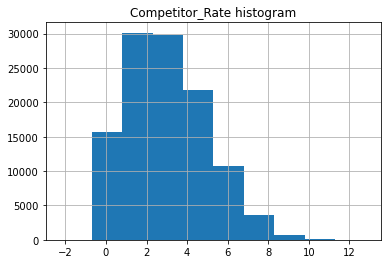

In [4]:
mortgage.Competitor_Rate.hist()

plt.title("Competitor_Rate histogram")
plt.show()

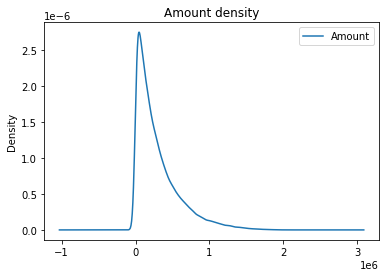

In [5]:
#mortgage.Amount.hist()
mortgage[["Amount"]].plot.kde()
plt.title("Amount density")
plt.show()

C:\Users\faiza\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


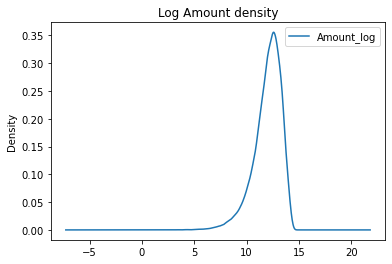

In [6]:
#mortgage.Competitor_Rate.hist()
#mortgage.Amount_log[np.isfinite(mortgage.Amount_log)].dropna().hist()
import numpy as np
mortgage['Amount_log']=np.log(mortgage.Amount)
mortgage[["Amount_log"]][np.isfinite(mortgage.Amount_log)].dropna().plot.kde()
plt.title("Log Amount density")
plt.show()

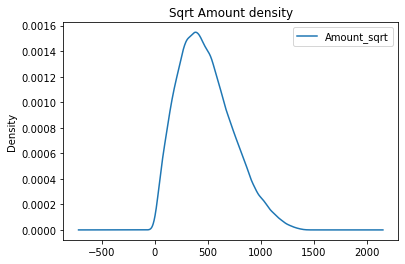

In [7]:
import numpy as np
mortgage['Amount_sqrt']=np.sqrt(mortgage.Amount)
mortgage[["Amount_sqrt"]][np.isfinite(mortgage.Amount_sqrt)].dropna().plot.kde()
plt.title("Sqrt Amount density")
plt.show()

<AxesSubplot:xlabel='Rate', ylabel='Risk_Score'>

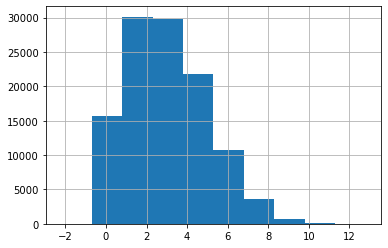

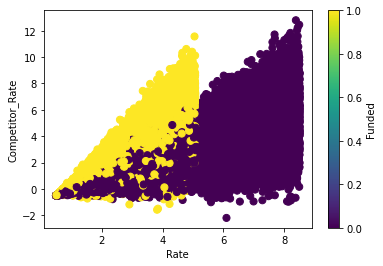

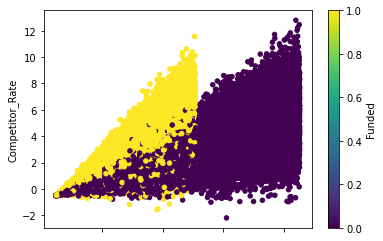

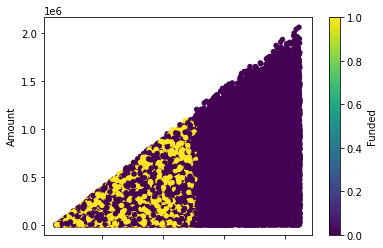

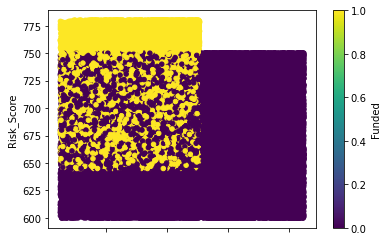

In [8]:
#print(mortgage.groupby('Funded').size())
mortgage.Competitor_Rate.hist()

fig, ax = plt.subplots()
mortgage.plot(kind="scatter", x="Rate", y="Competitor_Rate",
            s=50,
            c="Funded",
            cmap="viridis", ax=ax);

mortgage.plot.scatter(x='Rate',
                      y='Competitor_Rate',
                      c='Funded',
                       colormap='viridis')
mortgage.plot.scatter(x='Rate',
                      y='Amount',
                      c='Funded',
                       colormap='viridis')

mortgage.plot.scatter(x='Rate',
                      y='Risk_Score',
                      c='Funded',
                       colormap='viridis')

<AxesSubplot:xlabel='Rate', ylabel='Competitor_Rate'>

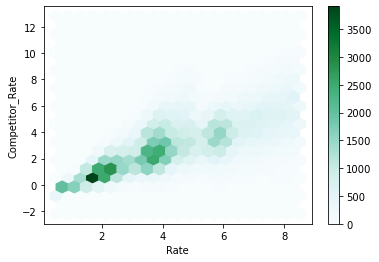

In [9]:
#print(mortgage.groupby('Funded').size())
#mortgage.Competitor_Rate.hist()
#mortgage.plot.scatter(x='Rate',
#                      y='Amount',
#                      c='Funded',
#                       colormap='viridis')

#mortgage.plot.scatter(x='Rate',
#                      y='Risk_Score',
#                      c='Funded',
#                       colormap='viridis')
fig, ax = plt.subplots()
#mortgage.plot(kind="scatter", x="Rate", y="Competitor_Rate",
#            s=50,
#            c="Funded",
#            cmap="viridis", ax=ax);

mortgage.plot.hexbin(x='Rate',
                      y='Competitor_Rate',
                      gridsize=20,ax=ax)


C:\Users\faiza\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


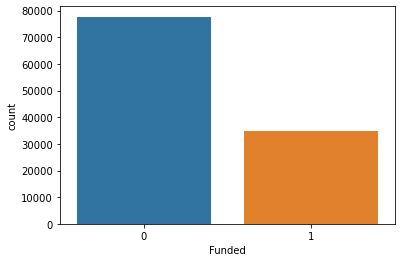

In [10]:
import seaborn as sns
sns.countplot(mortgage['Funded'],label="Count")
plt.show()

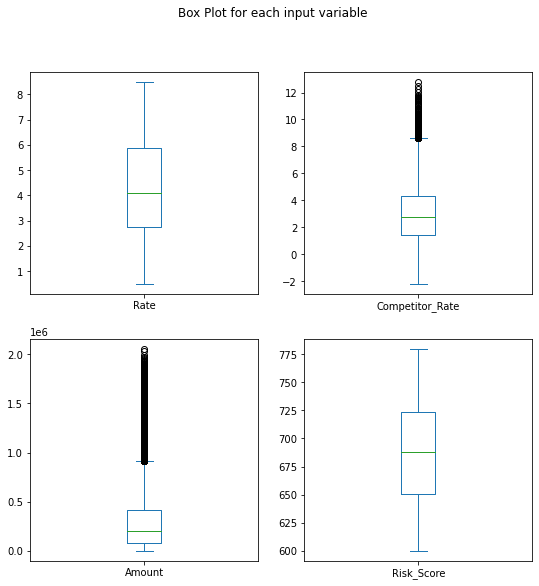

In [11]:
mortgage[['Funded','Rate', 'Competitor_Rate', 'Amount', 'Risk_Score']].drop('Funded', axis=1).plot(kind='box', subplots=True, layout=(2,2), sharex =False, sharey=False, figsize=(9,9), 
                                        title='Box Plot for each input variable')
plt.savefig('mortgage_box')
plt.show()
#True or 'all': x- or y-axis will be shared among all subplots.
#False or 'none': each subplot x- or y-axis will be independent.
#'row': each subplot row will share an x- or y-axis.
#'col': each subplot column will share an x- or y-axis.
#When subplots have a shared x-axis along a column, only the x tick labels of the bottom subplot are created. Similarly, when subplots have a shared y-axis along a row, only the y tick labels of the first column subplot are created.

# Testing Box Plot of Amount_Sqrt


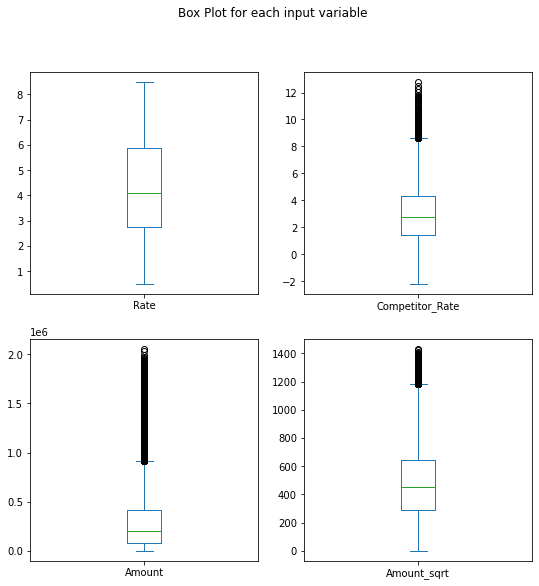

In [12]:
mortgage[['Funded','Rate', 'Competitor_Rate', 'Amount', 'Amount_sqrt']].drop('Funded', axis=1).plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(9,9), 
                                        title='Box Plot for each input variable')
plt.savefig('mortgage_box')
plt.show()

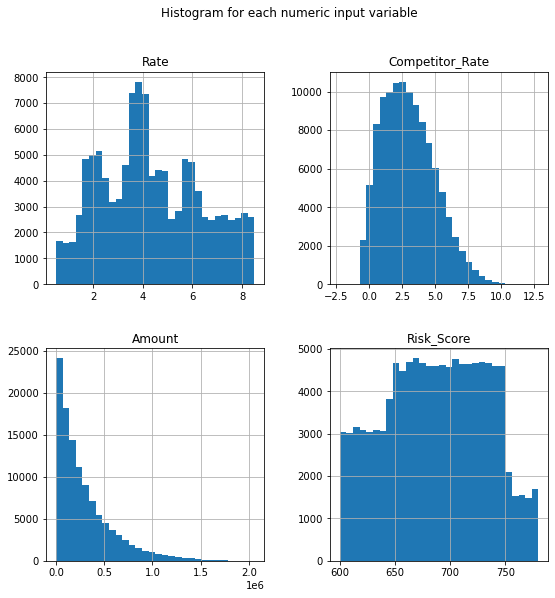

In [13]:
import pylab as pl
mortgage[['Funded','Rate', 'Competitor_Rate', 'Amount', 'Risk_Score']].drop('Funded' ,axis=1).hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('mortgage_hist')
plt.show()

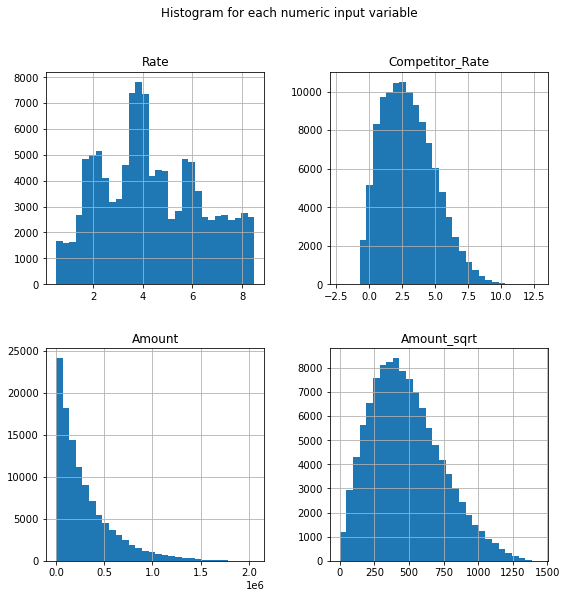

In [14]:
import pylab as pl
mortgage[['Funded','Rate', 'Competitor_Rate', 'Amount', 'Amount_sqrt']].drop('Funded' ,axis=1).hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('mortgage_hist')
plt.show()

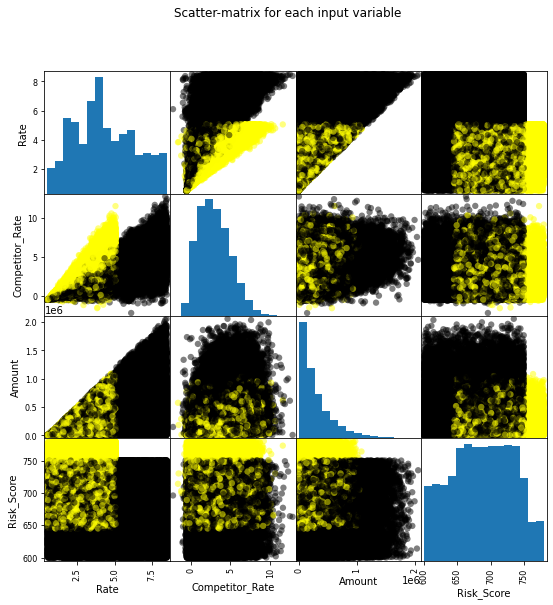

In [21]:
import pandas as pd
from matplotlib import cm
feature_names = ['Rate', 'Competitor_Rate', 'Amount', 'Risk_Score']
X = mortgage[feature_names]
y = mortgage['Funded']
cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X, c = y, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('mortgage_scatter_matrix')

In [22]:
feature_names = ['Rate', 'Competitor_Rate', 'Amount', 'Risk_Score']
X = mortgage[feature_names]
y = mortgage['Funded']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
display(X.head())
display(y.head())

,Rate,Competitor_Rate,Amount,Risk_Score
0,5.61,2.00,636419,739
1,6.00,4.30,100354,706
2,6.40,4.88,844255,681
3,4.75,2.16,216031,662
4,4.93,6.38,551685,708


0    0
1    0
2    0
3    0
4    1
Name: Funded, dtype: int64

In [24]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.86


In [25]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.85
Accuracy of Logistic regression classifier on test set: 0.85


In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.92
Accuracy of K-NN classifier on test set: 0.88


In [27]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = knn.predict(X_test)
#print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92     19640
           1       0.83      0.78      0.80      8513

    accuracy                           0.88     28153
   macro avg       0.87      0.85      0.86     28153
weighted avg       0.88      0.88      0.88     28153



In [28]:
pred = knn.predict([[0.5,0.1,0.,0.5]])
print(pred)
mortgage[(mortgage['Funded']==pred[0])]['Funded'].unique()[0]

[0]


0

C:\Users\faiza\AppData\Local\Temp/ipykernel_16912/3135436129.py:33: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


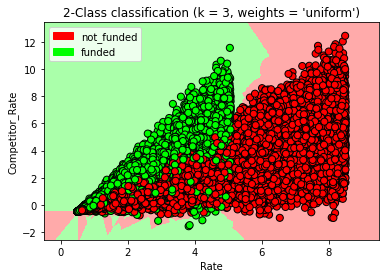

In [30]:
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
import matplotlib.patches as mpatches
import sklearn
import numpy as np
from sklearn import neighbors
X = mortgage[['Rate', 'Competitor_Rate', 'Amount', 'Risk_Score']]
y = mortgage['Funded']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
def plot_fruit_knn(X, y, n_neighbors, weights):
    X_mat = X[['Rate', 'Competitor_Rate']].to_numpy()
    y_mat = y.to_numpy()
# Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])#, '#AAAAFF','#AFAFAF'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00'])#, '#0000FF','#AFAFAF'])
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)
# Plot the decision boundary by assigning a color in the color map
    # to each mesh point.
    
    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50
    
    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
# Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    patch0 = mpatches.Patch(color='#FF0000', label='not_funded')
    patch1 = mpatches.Patch(color='#00FF00', label='funded')
    #patch2 = mpatches.Patch(color='#0000FF', label='orange')
    #patch3 = mpatches.Patch(color='#AFAFAF', label='lemon')
    plt.legend(handles=[patch0, patch1])
    plt.xlabel('Rate')
    plt.ylabel('Competitor_Rate')
    plt.title("2-Class classification (k = %i, weights = '%s')"
    % (n_neighbors, weights))    
    plt.show()
plot_fruit_knn(X_train, y_train, 3, 'uniform')

([<matplotlib.axis.XTick at 0x193d65b6bb0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

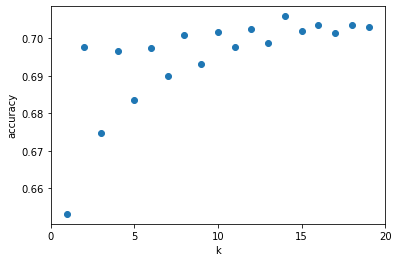

In [31]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])